Mediciones  [[-33.47002411 -70.76208496]
 [-33.47002411 -70.76208496]
 [-33.47002411 -70.76208496]
 [-33.46651292 -70.76212375]
 [-33.46192169 -70.76361847]
 [-33.45545959 -70.76795959]
 [-33.44975281 -70.77442932]]
                                  
                                  
Media del estado inicial  [-33.4700241088867, 40, -70.7620849609375, 40]
                                  
                                  
media del estado smoothed  [[-3.79742113e+01  1.78876695e+01 -7.52661034e+01  1.78872905e+01]
 [-3.29010309e+01  4.87746763e+00 -7.01924073e+01  4.87513436e+00]
 [-3.28808719e+01  5.32921620e-03 -7.01731373e+01  1.39493157e-03]
 [-3.33241556e+01 -4.29849765e-01 -7.06200205e+01 -4.35879074e-01]
 [-3.34677684e+01 -1.37080877e-01 -7.07701022e+01 -1.45715604e-01]
 [-3.34707059e+01 -2.08647920e-03 -7.07832342e+01 -1.25131599e-02]
 [-3.34530712e+01  1.72207296e-02 -7.07772389e+01  6.39062289e-03]]
                                  
                                  
cova

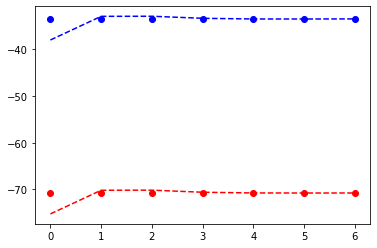

In [57]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import time


measurements = np.asarray([(-33.4700241088867,-70.7620849609375),
                           (-33.4700241088867,-70.7620849609375),
                           (-33.4700241088867,-70.7620849609375),
                           (-33.4665129182731,-70.7621237495235),
                           (-33.4619216918945,-70.7636184692383),
                           (-33.4554595947266,-70.7679595947266),
                           (-33.4497528076172,-70.7744293212891)])

print("Mediciones ", measurements)
print ("                                  ")
print ("                                  ")

initial_state_mean = [measurements[0, 0],
                      40,
                      measurements[0, 1],
                      40]

print("Media del estado inicial ", initial_state_mean)
print ("                                  ")
print ("                                  ")

transition_matrix = [[1, 1, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 1],
                     [0, 0, 0, 1]]

observation_matrix = [[1, 0, 0, 0],
                      [0, 0, 1, 0]]

kf1 = KalmanFilter(transition_matrices = transition_matrix,
                  observation_matrices = observation_matrix,
                  initial_state_mean = initial_state_mean)

kf1 = kf1.em(measurements, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(measurements)
 
print ("media del estado smoothed " , smoothed_state_means)
print ("                                  ")
print ("                                  ")

print ("covarianza del estado smoothed " ,smoothed_state_covariances)

plt.figure(1)
times = range(measurements.shape[0])
plt.plot(times, measurements[:, 0], 'bo',
         times, measurements[:, 1], 'ro',
         times, smoothed_state_means[:, 0], 'b--',
         times, smoothed_state_means[:, 2], 'r--',)
plt.show()
